# Lab: Central Limit Theorem

Welcome! In this ungraded lab see applications of the Central Limit Theorem when working with different distributions of data. You will see how to see the theorem in action, as well as scenarios in which the theorem doesn't hold.

Let's get started!

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from dataclasses import dataclass
import utils

## Gaussian population

Begin with the most straightforward scenario: when your population follows a Gaussian distribution. You will generate the data for this population by using the [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) function:

In [2]:
mu = 10
sigma = 5

gaussian_population = np.random.normal(mu, sigma, 100_000)

The population has a mean of 10 and a standard deviation of 5 and a total of 100'000 observations. You can visualize its histogram by running the next cell:

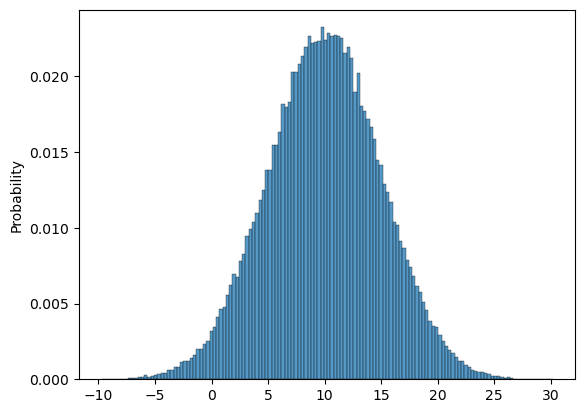

In [4]:
sns.histplot(gaussian_population, stat="probability")
plt.show()

In [5]:
gaussian_pop_mean = np.mean(gaussian_population)
gaussian_pop_std = np.std(gaussian_population)

print(f"Gaussian population has mean: {gaussian_pop_mean:.2f} and std: {gaussian_pop_std:.2f}")

Gaussian population has mean: 9.98 and std: 5.00


In [6]:
@dataclass
class gaussian_params:
    mean: float = gaussian_pop_mean
    std: float = gaussian_pop_std

The CLT works as follows:

- You take random samples out of the population (the sampling is done with replacement, which means that once you select an element you put it back in the sampling space so you could choose a particular element more than once)

- Compute the mean of each sample

n_samples no me afecta el teorema sino que tan bien se ve el histograma!

In [8]:
def sample_means(data, sample_size):
    
    means = []

    for _ in range(10_000):
        sample = np.random.choice(data, size=sample_size)
        means.append(np.mean(sample))
        
    return np.array(means)


arrancar el sample size en 2

In [14]:
from importlib import reload
reload(utils)

<module 'utils' from '/home/jovyan/work/utils.py'>

In [12]:
utils.gaussian_clt(gaussian_population, gaussian_params)

interactive(children=(IntSlider(value=5, continuous_update=False, description='sample_size', min=2, step=10), …

## Binomial Population

In [173]:
binomial_population

array([2, 8, 5, ..., 7, 4, 7])

In [13]:
n = 5
p = 0.8
sample_size = 3
N = n*sample_size


binomial_population = np.random.binomial(n, p, 100_000)

# np.min([n*p, n*(1-p)])
np.min([N*p, N*(1-p)])

2.999999999999999

cuando estoy en el mundo de las binomiales: el n que tengo que usar para los test es como n*sample_size

In [ ]:
sns.histplot(binomial_population)
plt.show()

In [79]:
binomial_sample_means = sample_means(binomial_population, n_samples=10_000, sample_size=sample_size)

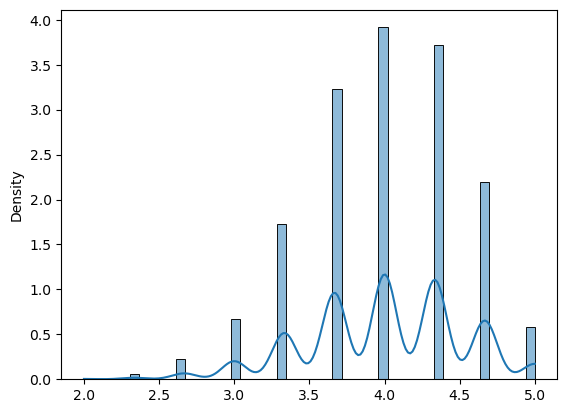

In [80]:
sns.histplot(binomial_sample_means,stat="density", kde=True)
plt.show()

In [81]:
mu = n*p
sigma = np.sqrt(n*p*(1-p))/np.sqrt(sample_size)

# norm_data = np.random.normal(mu, sigma, 10_000)

In [82]:
x_range = np.linspace(min(binomial_sample_means), max(binomial_sample_means), 100)

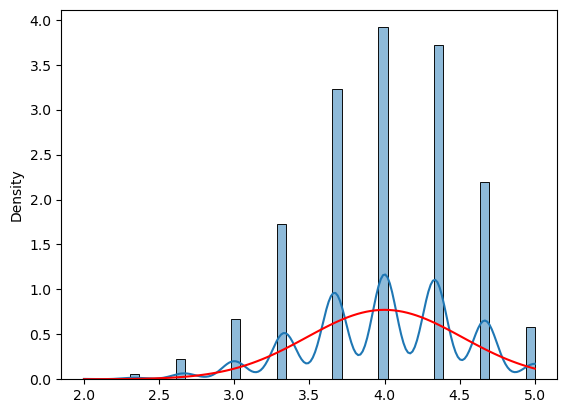

In [84]:
sns.histplot(binomial_sample_means,stat="density", kde=True)
plt.plot(x_range,norm.pdf(x_range, loc=mu, scale=sigma), color="red")

plt.show()

In [23]:
n*p

32.0

In [24]:
np.mean(binomial_population)

32.00488

In [25]:
np.sqrt(n*p*(1-p))

2.529822128134703

In [26]:
np.std(binomial_population)

2.5314810261189002

In [27]:
np.mean(binomial_sample_means)

31.999527999999998

# Aqui es denominador si es el sample_size

In [34]:
np.sqrt(n*p*(1-p))/np.sqrt(5)

1.1313708498984758

In [35]:
np.std(binomial_sample_means)

1.117348504093508

In [63]:
real_sigma = np.std(binomial_sample_means)
real_sigma

0.47894620319567793

In [50]:
n*p

32.0

In [51]:
theoretical_sigma = np.sqrt(n*p*(1-p))/np.sqrt(30)
theoretical_sigma

0.46188021535170054

In [193]:
abs(theoretical_sigma-real_sigma)/theoretical_sigma

0.026950067121424705

In [65]:
reload(utils)

<module 'utils' from '/home/jovyan/work/utils.py'>

In [66]:
utils.binomial_clt()

interactive(children=(IntSlider(value=2, continuous_update=False, description='sample_size', max=50, min=2), F…

## Poisson Population

In [197]:
poisson_population

array([2, 1, 4, ..., 4, 5, 1])

In [208]:
mu = 3
n=15

poisson_population = np.random.poisson(mu, 10_000)


In [209]:
np.mean(poisson_population)

3.0008

In [211]:
poisson_population_std = np.std(poisson_population)

poisson_population_std

1.703995117363897

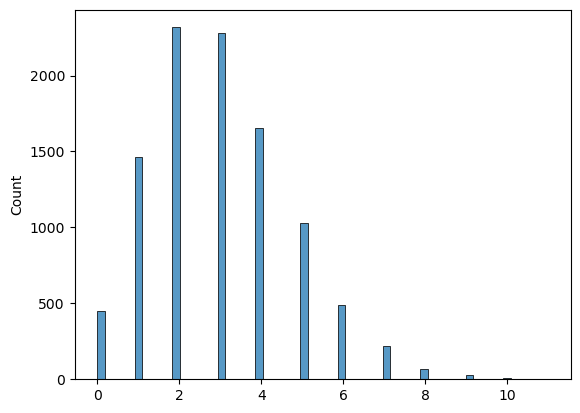

In [212]:
sns.histplot(poisson_population)
plt.show()

In [213]:
poisson_sample_means = sample_means(poisson_population, 1000, n)

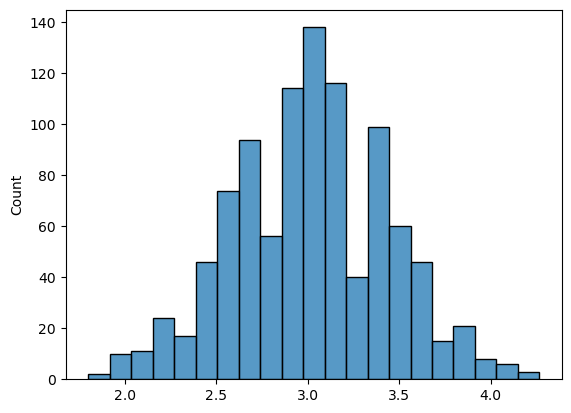

In [214]:
sns.histplot(poisson_sample_means)
plt.show()

In [215]:
np.mean(poisson_sample_means)

3.0136

In [216]:
np.std(poisson_sample_means)

0.4220920594688636

In [218]:
poisson_population_std/np.sqrt(n)

0.4399696474379417

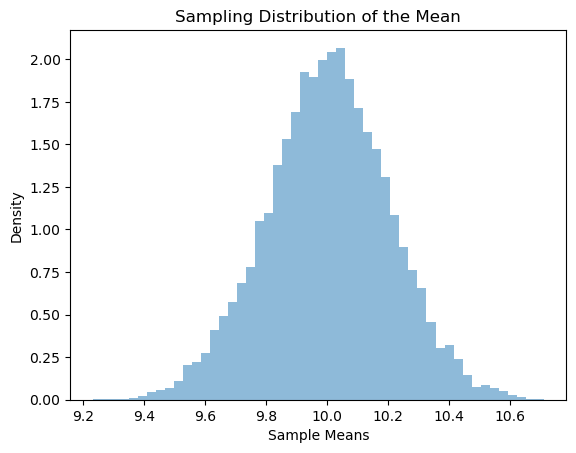

In [40]:
mu = 10  # mean
sigma = 2  # standard deviation

# generate population
population = np.random.normal(mu, sigma, size=100000)

# simulate sampling distribution of the mean
sample_means = []
for i in range(10000):
    sample = np.random.choice(population, size=100)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# plot sampling distribution
plt.hist(sample_means, bins=50, density=True, alpha=0.5)
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Sampling Distribution of the Mean')
plt.show()

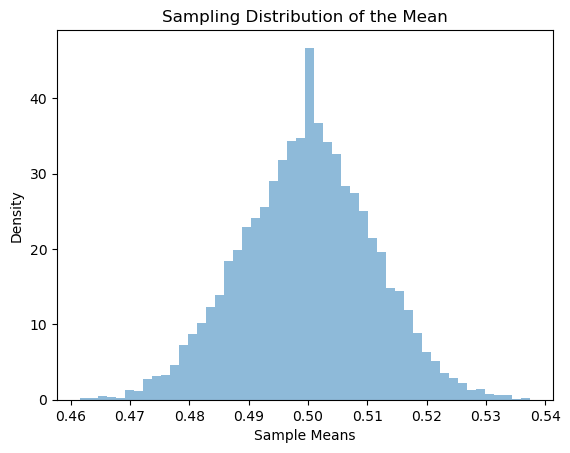

In [52]:
# define population parameters
n = 20  # number of trials
p = 0.5  # probability of success

# generate population
population = np.random.binomial(n, p, size=100000)

# simulate sampling distribution of the mean
sample_means = []
for i in range(10000):
    sample = np.random.choice(population, size=100)
    sample_mean = np.mean(sample) / n
    sample_means.append(sample_mean)

# plot sampling distribution
plt.hist(sample_means, bins=50, density=True, alpha=0.5)
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Sampling Distribution of the Mean')
plt.show()

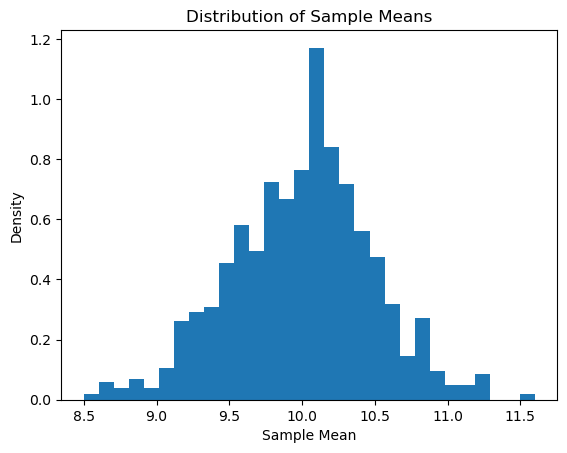

In [68]:
# define population parameters
n = 20  # number of trials
p = 0.5  # probability of success
N = 100000  # population size

# generate population
population = np.random.binomial(n, p, size=N)

# compute mean and standard deviation of the sample means
mean_sample_means = p
std_error = np.sqrt(p*(1-p)/n)
std_sample_means = std_error / np.sqrt(N)

# generate samples and compute sample means
num_samples = 1000  # number of samples
sample_means = []
for i in range(num_samples):
    sample = np.random.choice(population, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# plot distribution of sample means
plt.hist(sample_means, bins=30, density=True)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
# plt.xlim([0, 1])
# plt.ylim([0, 10])
plt.show()

In [69]:
np.std(sample_means)

0.4893219773318995

In [70]:
std_sample_means

0.0003535533905932737

In [72]:
np.sqrt(p*(1-p)*n) / np.sqrt(n)

0.5